In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import cleaner
df = cleaner.cleanholdout()
df = cleaner.cumulator(df)

/Users/HZB/galv/capstone/cleaner.py:61: FutureWarning: 'comp_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  cumsum2 = clean_df.groupby(by=['comp_id', 'date','userID']).sum().groupby(level=[0]).cumsum()
/Users/HZB/galv/capstone/cleaner.py:61: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  cumsum2 = clean_df.groupby(by=['comp_id', 'date','userID']).sum().groupby(level=[0]).cumsum()
/Users/HZB/galv/capstone/cleaner.py:61: FutureWarning: 'userID' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  cumsum2 = clean_df.groupby(by=['comp_id', 'date','userID']).sum().groupby(level=[0]).cumsum()
/Users/HZB/galv/capstone/cleaner.py:69: FutureWarning: 'userID' is both a column name and an index level.
Defaulting to column but this will raise an ambig

In [5]:
df.head()

,,,userID,comp_id,rating,filtered,date,user_id,user-comp,review_text,comp_name,review_length,biz_rvws,user_rvws,avg_rating,past_filt,percent_filt,avg_rev_len
userID,date,comp_id,,,,,,,,,,,,,,,,
30262,2004-10-20,468,30262,468,4.0,0,2004-10-20,VSKUlW-uL7E3nf4dxs5cSw,30262-468,Excellent Soup Dumplings. It's a must if you g...,Joe’s Shanghai,214,1,1,4.0,0,0.0,214.0
107234,2004-11-02,510,107234,510,4.0,0,2004-11-02,EnmELstQQKBwlQ1VKJn7wQ,107234-510,One of the best hidden no-name neighborhood pl...,Cafe Habana,496,1,1,4.0,0,0.0,496.0
19015,2004-12-09,142,19015,142,5.0,0,2004-12-09,THUzhkWhdXO92axNzw9L0w,19015-142,"Really lovely Italian food, very simple and we...",Supper,346,1,1,5.0,0,0.0,346.0
116117,2005-03-02,708,116117,708,5.0,0,2005-03-02,DoBupYIzLs0c8ataxQhE5w,116117-708,"Mario Batali at his best, this is my current f...",Lupa,60,1,1,5.0,0,0.0,60.0
59929,2005-03-07,454,59929,454,5.0,0,2005-03-07,qfw0omIA2Cthnq0AxZablA,59929-454,Best place for brunch if you can handle the wa...,Cafeteria,85,1,1,5.0,0,0.0,85.0


In [72]:
df5 = df.set_index(['userID','date', 'comp_id'], inplace=False, drop=False)
df5['user_rvws'] =1
cumsum2 = df5.groupby(by=['userID','date', 'comp_id']).sum().groupby(level=[0]).cumsum()
df5 = df5.drop('user_rvws', axis=1)
cumsum2['avg_rating'] = cumsum2['rating']/cumsum2['user_rvws']

cumsum2['past_filt'] = cumsum2['filtered']
cumsum2.loc[cumsum2['filtered'] > 0, 'past_filt'] -= 1

cumsum2['percent_filt'] = cumsum2['past_filt']/cumsum2['user_rvws']
cumsum2['avg_rev_len'] = cumsum2['review_length']/cumsum2['user_rvws']
cumsum2 = cumsum2.drop(['rating', 'review_length','biz_rvws','filtered'], axis=1)
df6 = df5.join(cumsum2, how='left', lsuffix='_left', rsuffix='_right')


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'userID' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'comp_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
df6.head()

,userID,comp_id,rating,filtered,date,user_id,user-comp,review_text,comp_name,review_length,biz_rvws,user_rvws,avg_rating,past_filt,percent_filt,avg_rev_len
0,30262,468,4.0,0,2004-10-20,VSKUlW-uL7E3nf4dxs5cSw,30262-468,Excellent Soup Dumplings. It's a must if you g...,Joe’s Shanghai,214,1,1,4.0,0,0.0,214.0
1,107234,510,4.0,0,2004-11-02,EnmELstQQKBwlQ1VKJn7wQ,107234-510,One of the best hidden no-name neighborhood pl...,Cafe Habana,496,1,1,4.0,0,0.0,496.0
2,19015,142,5.0,0,2004-12-09,THUzhkWhdXO92axNzw9L0w,19015-142,"Really lovely Italian food, very simple and we...",Supper,346,1,1,5.0,0,0.0,346.0
3,116117,708,5.0,0,2005-03-02,DoBupYIzLs0c8ataxQhE5w,116117-708,"Mario Batali at his best, this is my current f...",Lupa,60,1,1,5.0,0,0.0,60.0
4,59929,454,5.0,0,2005-03-07,qfw0omIA2Cthnq0AxZablA,59929-454,Best place for brunch if you can handle the wa...,Cafeteria,85,1,1,5.0,0,0.0,85.0


In [10]:
df2 = cleaner.cumulator(df)

/Users/HZB/galv/capstone/cleaner.py:61: FutureWarning: 'comp_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  cumsum2 = clean_df.groupby(by=['comp_id', 'date','userID']).sum().groupby(level=[0]).cumsum()
/Users/HZB/galv/capstone/cleaner.py:61: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  cumsum2 = clean_df.groupby(by=['comp_id', 'date','userID']).sum().groupby(level=[0]).cumsum()
/Users/HZB/galv/capstone/cleaner.py:61: FutureWarning: 'userID' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  cumsum2 = clean_df.groupby(by=['comp_id', 'date','userID']).sum().groupby(level=[0]).cumsum()
/Users/HZB/galv/capstone/cleaner.py:70: FutureWarning: 'userID' is both a column name and an index level.
Defaulting to column but this will raise an ambig

In [39]:
features = ['rating','filtered','review_length','biz_rvws',
       'percent_filt', 'user_rvws', 'avg_rating', 'percent_filt',
       'avg_rev_len']

In [73]:
test_df = df[features]

In [28]:
test_df = test_df.sort_values('date')

(array([ 3566.,     0.,  2391.,     0.,     0.,  3167.,     0., 10732.,
            0., 17004.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

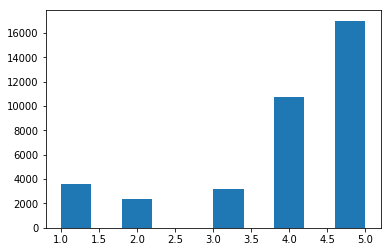

In [74]:
plt.hist(test_df[test_df['filtered'] == 1].rating)

(array([ 10656.,      0.,  18383.,      0.,      0.,  44464.,      0.,
        124470.,      0., 124124.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

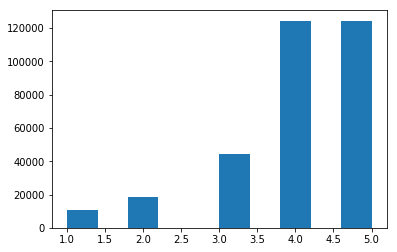

In [75]:
plt.hist(test_df[test_df['filtered'] != 1].rating)

In [ ]:
plt.hist(test_df[test_df['filtered'] == 1].avg_rev_len)

In [41]:
test_df.head()

,,,rating,filtered,review_length,biz_rvws,percent_filt,percent_filt,user_rvws,avg_rating,percent_filt,percent_filt,avg_rev_len
userID,date,comp_id,,,,,,,,,,,
30262,2004-10-20,468,4.0,0,214,1,0,0.0,1,4.0,0,0.0,214.0
107234,2004-11-02,510,4.0,0,496,1,0,0.0,1,4.0,0,0.0,496.0
19015,2004-12-09,142,5.0,0,346,1,0,0.0,1,5.0,0,0.0,346.0
116117,2005-03-02,708,5.0,0,60,1,0,0.0,1,5.0,0,0.0,60.0
59929,2005-03-07,454,5.0,0,85,1,0,0.0,1,5.0,0,0.0,85.0


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
non_holdout, hold_out = train_test_split(test_df, test_size=0.1, random_state=0, shuffle=False)

In [60]:
###### Drop percent_filt

In [61]:
non_holdout= non_holdout.drop('percent_filt', axis=1)

In [62]:
X_train,X_test = train_test_split(non_holdout, test_size=0.3, random_state=0, shuffle=False)

In [63]:
y_train = X_train.pop('filtered')

In [64]:
y_test = X_test.pop('filtered')

In [56]:
from sklearn import linear_model, datasets
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
logreg = linear_model.LogisticRegression()

In [66]:
result = logreg.fit(X_train, y_train)

In [67]:
preds = result.predict(X_test)
print(f"{result} Results",confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) Results [[87480     0]
 [ 9439     0]]


             precision    recall  f1-score   support

          0       0.90      1.00      0.95     87480
          1       0.00      0.00      0.00      9439

avg / total       0.81      0.90      0.86     96919



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification



In [61]:
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X_train, y_train)

# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=2, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
#             oob_score=False, random_state=0, verbose=0, warm_start=False)
# preds = clf.predict(X_test)

In [72]:
print(f"{clf} Results",confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False) Results [[87480     0]
 [ 9439     0]]


             precision    recall  f1-score   support

          0       0.90      1.00      0.95     87480
          1       0.00      0.00      0.00      9439

avg / total       0.81      0.90      0.86     96919



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
features = ['rating','filtered','review_length','biz_rvws', 'user_rvws', 'avg_rating','avg_rev_len']

In [50]:
test_data = df6[features]


In [56]:
test_data.reset_index(drop=True, inplace=True)
    

In [57]:
test_data.head()

,rating,filtered,review_length,biz_rvws,user_rvws,avg_rating,avg_rev_len
0,4.0,0,214,1,1,4.0,214.0
1,4.0,0,496,1,1,4.0,496.0
2,5.0,0,346,1,1,5.0,346.0
3,5.0,0,60,1,1,5.0,60.0
4,5.0,0,85,1,1,5.0,85.0


In [78]:
import classifiers

In [79]:
X_train, X_test, y_train, y_test = classifiers.balanced_split(df6)

In [76]:
classifiers.run_models(X_train, X_test, y_train, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False) Results [[52508 34408]
 [ 2224  7779]]


Feature importance: {clf.feature_importances_}
             precision    recall  f1-score   support

          0       0.96      0.60      0.74     86916
          1       0.18      0.78      0.30     10003

avg / total       0.88      0.62      0.70     96919

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) Results [[44552 42364]
 [ 176

In [90]:
import classifiers
X_train, X_test, y_train, y_test = classifiers.balanced_split(df6)
classifiers.run_models(X_train, X_test, y_train, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False) Results [[51338 35578]
 [  512  9491]]


Feature importance: {clf.feature_importances_}
             precision    recall  f1-score   support

          0       0.99      0.59      0.74     86916
          1       0.21      0.95      0.34     10003

avg / total       0.91      0.63      0.70     96919

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) Results [[53366 33550]
 [  35

In [82]:
import nlp_fake

In [91]:
X_train, X_test, y_train, y_test = nlp_fake.balanced_class(df6)

In [92]:
X_train, X_test, y_train, y_test = nlp_fake.tfidfed(X_train, X_test, y_train, y_test)

['00pm', '10pm', '11am', '11pm', '14th', '15pm', '1pm', '1st', '2am', '2nd', '2pm', '30am', '30pm', '3pm', '3rd', '4am', '4pm', '4th', '53rd', '5pm', '5th', '6pm', '6th', '7pm', '7th', '8pm', '8th', '9pm', '9th', 'abc']


In [89]:
classifiers.run_models(X_train, X_test, y_train, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False) Results [[37813 49103]
 [ 2552  7451]]


Feature importance: {clf.feature_importances_}
             precision    recall  f1-score   support

          0       0.94      0.44      0.59     86916
          1       0.13      0.74      0.22     10003

avg / total       0.85      0.47      0.56     96919

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) Results [[55572 31344]
 [ 338

In [93]:
X_train, X_test, y_train, y_test = nlp_fake.count_vectored(X_train, X_test, y_train, y_test)
classifiers.run_models(X_train, X_test, y_train, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False) Results [[39150 47766]
 [ 2668  7335]]


Feature importance: {clf.feature_importances_}
             precision    recall  f1-score   support

          0       0.94      0.45      0.61     86916
          1       0.13      0.73      0.23     10003

avg / total       0.85      0.48      0.57     96919

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) Results [[49402 37514]
 [ 310

In [94]:
import classifiers
X_train, X_test, y_train, y_test = classifiers.balanced_split(df6)
classifiers.run_models(X_train, X_test, y_train, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False) Results [[86916     0]
 [ 9970    33]]


Feature importance: {clf.feature_importances_}
             precision    recall  f1-score   support

          0       0.90      1.00      0.95     86916
          1       1.00      0.00      0.01     10003

avg / total       0.91      0.90      0.85     96919

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) Results [[86895    21]
 [ 780

In [157]:
import classifiers
X_train, X_train_tfidf, X_test, X_test_tfidf, y_train, y_test = classifiers.balanced_split(df6)
#classifiers.run_models(X_train, X_test, y_train, y_test)

In [158]:
import nlp_fake

In [159]:
X_train_tfidf, X_test_tfidf, y_train, y_test, tfidf_columns = nlp_fake.tfidfed(X_train_tfidf, X_test_tfidf, y_train, y_test)

In [113]:
X_train.head()

,rating,review_length,biz_rvws,user_rvws,avg_rating,past_filt,percent_filt,avg_rev_len
220620,5.0,27,4061,1,5.0,0,0.0,27.0
263407,5.0,1398,403,1,5.0,0,0.0,1398.0
221929,3.0,357,2341,2,3.0,1,0.5,311.0
27173,4.0,430,136,2,4.0,0,0.0,488.0
176371,5.0,374,2277,1,5.0,0,0.0,374.0


In [160]:
y_test.shape

(48460,)

In [161]:
len(X_train)

56464

In [162]:
X_train_mid = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_columns)

In [163]:
X_test_mid = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_columns)

In [164]:
X_train.reset_index(drop=True, inplace=True)

In [166]:
X_test.reset_index(drop=True, inplace=True)

In [167]:
X_test = pd.concat([X_test, X_test_mid], axis=1)

In [169]:
X_train = pd.concat([X_train, X_train_mid], axis=1)

In [170]:
X_test.shape

(48460, 5008)

In [171]:
X_train.shape

(56464, 5008)

In [172]:
classifiers.run_models(X_train, X_test, y_train, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False) Results [[24697 18732]
 [ 1700  3331]]


Feature importance: {clf.feature_importances_}
             precision    recall  f1-score   support

          0       0.94      0.57      0.71     43429
          1       0.15      0.66      0.25      5031

avg / total       0.85      0.58      0.66     48460

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) Results [[31121 12308]
 [  55

In [142]:
X_test_model = X_test_model.fillna(value=0, axis=1)

In [133]:
mat = X_test_tfidf.toarray()
np.any(np.isnan(mat))

False

In [134]:
np.all(np.isfinite(mat))

True

In [135]:
mat = X_train_tfidf.toarray()
np.any(np.isnan(mat))
np.all(np.isfinite(mat))

False

In [136]:
np.all(np.isfinite(mat))

True

In [143]:
X_model.shape

(46520, 5008)

In [144]:
X_test_model.shape

(164734, 5008)

In [146]:
X_test_tfidf.shape

(96919, 5000)

In [174]:
X_train_tfidf, X_test_tfidf, y_train, y_test, tfidf_columns = nlp_fake.tfidfed(X_train_tfidf, X_test_tfidf, y_train, y_test)

In [ ]:
X_train_mid = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_columns)
X_test_mid = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_columns)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test, X_test_mid], axis=1)
X_train = pd.concat([X_train, X_train_mid], axis=1)
print(X_train.shape)
print(X_test.shape)

(48460, 5008)
(274601, 5008)


In [ ]:
classifiers.run_models(X_train, X_test, y_train, y_test)

In [ ]:
import cleaner
df = cleaner.cleanholdout()
df = cleaner.cumulator(df)
print(df.head())
import classifiers
X_train, X_train_tfidf, X_test, X_test_tfidf, y_train, y_test = classifiers.unbalanced_split(df)
X_train_tfidf, X_test_tfidf, y_train, y_test, tfidf_columns = nlp_fake.tfidfed(X_train_tfidf, X_test_tfidf, y_train, y_test)
X_train_mid = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_columns)
X_test_mid = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_columns)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test, X_test_mid], axis=1)
X_train = pd.concat([X_train, X_train_mid], axis=1)
print(X_train.shape)
print(X_test.shape)
classifiers.run_models(X_train, X_test, y_train, y_test)

In [6]:
import cleaner
df = cleaner.cleanholdout()
df = cleaner.cumulator(df)
#print(df.head())
import classifiers
X_train, X_train_tfidf, X_test, X_test_tfidf, y_train, y_test = classifiers.unbalanced_split(df)

/Users/HZB/galv/capstone/cleaner.py:61: FutureWarning: 'comp_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  cumsum2 = clean_df.groupby(by=['comp_id', 'date','userID']).sum().groupby(level=[0]).cumsum()
/Users/HZB/galv/capstone/cleaner.py:61: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  cumsum2 = clean_df.groupby(by=['comp_id', 'date','userID']).sum().groupby(level=[0]).cumsum()
/Users/HZB/galv/capstone/cleaner.py:61: FutureWarning: 'userID' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  cumsum2 = clean_df.groupby(by=['comp_id', 'date','userID']).sum().groupby(level=[0]).cumsum()
/Users/HZB/galv/capstone/cleaner.py:69: FutureWarning: 'userID' is both a column name and an index level.
Defaulting to column but this will raise an ambig

In [7]:
import scores
X_test_read = scores.get_scores(X_test_tfidf)

In [8]:
X_train_read = scores.get_scores(X_train_tfidf)

In [9]:
X_test_mid = np.asarray(X_test_read)

In [10]:
X_train_mid = np.asarray(X_train_read) 

In [11]:
mat = X_train_mid
print(np.any(np.isnan(mat)))
print(np.all(np.isfinite(mat)))

False
True


In [12]:
read_columns= ["ARI", "FleschReadingEase", "FleschKincaidGradeLevel", "GunningFogIndex","SMOGIndex","ColemanLiauIndex","LIX","RIX"]
test_mid = pd.DataFrame(X_test_mid, columns=read_columns)

In [13]:
train_mid = pd.DataFrame(X_train_mid, columns=read_columns)

In [14]:
len(train_mid)

274601

In [17]:
train_mid.head()

,ARI,FleschReadingEase,FleschKincaidGradeLevel,GunningFogIndex,SMOGIndex,ColemanLiauIndex,LIX,RIX
0,6.754677,46.1429,8.7486,9.5516,9.123724,10.7290,36.782258,2.250000
1,3.817162,76.2625,4.9202,8.0243,8.477226,6.7454,30.871622,2.000000
2,5.916048,71.1685,6.5458,9.7094,9.633250,7.9907,32.520962,2.533333
3,3.949687,86.2613,4.2087,6.4667,6.872983,5.9349,18.250000,0.750000
4,6.549545,64.9245,6.9364,9.8545,9.708204,9.5841,31.454545,2.250000


In [16]:
test_mid.describe()

,ARI,FleschReadingEase,FleschKincaidGradeLevel,GunningFogIndex,SMOGIndex,ColemanLiauIndex,LIX,RIX
count,48460.000000,48460.000000,48460.000000,48460.000000,48460.000000,48460.000000,48460.000000,48460.000000
mean,5.837691,75.965689,6.110213,9.202550,8.699548,6.879754,29.891459,2.172791
std,4.773288,15.282579,3.337252,3.605179,2.031026,4.166308,9.805815,1.352046
min,-16.220000,-470.980000,-15.200000,0.000000,0.000000,-52.240000,0.000000,0.000000
25%,3.722434,69.315050,4.382175,7.345400,7.629100,5.616375,24.672754,1.400000
50%,5.414267,76.772400,5.862600,8.961500,8.700877,6.919200,29.285714,2.000000
75%,7.334377,84.138800,7.431000,10.666700,9.831301,8.215000,34.172828,2.692308
max,553.690000,205.820000,125.811400,131.945700,29.832816,672.780000,334.493827,37.000000


In [18]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [19]:
X_train_new = pd.concat([X_train, train_mid], axis=1)

In [20]:
X_test_new = pd.concat([X_test, test_mid], axis=1)

In [21]:
X_test_new.head()

,rating,review_length,biz_rvws,user_rvws,avg_rating,past_filt,percent_filt,avg_rev_len,ARI,FleschReadingEase,FleschKincaidGradeLevel,GunningFogIndex,SMOGIndex,ColemanLiauIndex,LIX,RIX
0,5.0,356,9,1,5.000000,0,0.0,356.000000,4.193831,87.0286,3.4629,5.5896,6.585686,7.1662,27.610390,1.714286
1,4.0,965,159,1,4.000000,0,0.0,965.000000,8.130483,73.9002,6.4504,10.6037,10.245688,10.2303,33.018245,2.666667
2,3.0,756,1037,14,3.928571,0,0.0,446.428571,4.969122,90.0644,4.3739,7.5416,7.242641,5.9320,29.664865,2.200000
3,5.0,1101,41,16,3.937500,0,0.0,698.875000,1.825796,95.0913,2.2418,6.9788,7.774935,4.3111,25.411681,1.480000
4,4.0,701,9,3,4.333333,0,0.0,461.000000,1.511143,97.2600,2.3552,6.9524,7.629100,3.3893,18.714286,0.857143


In [67]:
mat = blah
np.any(np.isnan(mat))
np.all(np.isfinite(mat))

True

In [24]:
import nlp_fake

In [25]:
X_train_tfidf, X_test_tfidf, y_train, y_test, tfidf_columns = nlp_fake.tfidfed(X_train_tfidf, X_test_tfidf, y_train, y_test)
X_train_mid = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_columns)
X_test_mid = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_columns)
# X_train.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
X_test_new = pd.concat([X_test_new, X_test_mid], axis=1)
X_train_new = pd.concat([X_train_new, X_train_mid], axis=1)
print(X_train_new.shape)
print(X_test_new.shape)


(274601, 5016)
(48460, 5016)


In [ ]:
classifiers.run_models(X_train_new, X_test_new, y_train, y_test)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False) Results [[26907 16522]
 [ 1049  3982]]


             precision    recall  f1-score   support

          0       0.96      0.62      0.75     43429
          1       0.19      0.79      0.31      5031

avg / total       0.88      0.64      0.71     48460

0.6374122988031367
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) Results [[27100 16329]
 [ 

In [44]:
print(X_train.shape)
print(X_test.shape)
classifiers.run_models(X_train, X_test, y_train, y_test)

(274601, 8)
(48460, 8)
RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False) Results [[29230 14199]
 [  424  4607]]


Feature importance: {clf.feature_importances_}
             precision    recall  f1-score   support

          0       0.99      0.67      0.80     43429
          1       0.24      0.92      0.39      5031

avg / total       0.91      0.70      0.76     48460



In [64]:
print(X_train_new.shape)
print(X_test_new.shape)
classifiers.run_models(X_train_new, X_test_new, y_train, y_test)

(274601, 16)
(48460, 16)
RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False) Results [[29650 13779]
 [  495  4536]]


Feature importance: ['0.03292', '0.04337', '0.00061', '0.31784', '0.06222', '0.20453', '0.24556', '0.07838', '0.00149', '0.00007', '0.00023', '0.00106', '0.00225', '0.00297', '0.00113', '0.00536']
             precision    recall  f1-score   support

          0       0.98      0.68      0.81     43429
          1       0.25      0.90      0.39      5031

avg / total       0.91      0.71      0.76     48460



In [65]:
X_test_new.head()

,rating,review_length,biz_rvws,user_rvws,avg_rating,past_filt,percent_filt,avg_rev_len,ARI,FleschReadingEase,FleschKincaidGradeLevel,GunningFogIndex,SMOGIndex,ColemanLiauIndex,LIX,RIX
0,5.0,356,9,1,5.000000,0,0.0,356.000000,4.193831,87.0286,3.4629,5.5896,6.585686,7.1662,27.610390,1.714286
1,4.0,965,159,1,4.000000,0,0.0,965.000000,8.130483,73.9002,6.4504,10.6037,10.245688,10.2303,33.018245,2.666667
2,3.0,756,1037,14,3.928571,0,0.0,446.428571,4.969122,90.0644,4.3739,7.5416,7.242641,5.9320,29.664865,2.200000
3,5.0,1101,41,16,3.937500,0,0.0,698.875000,1.825796,95.0913,2.2418,6.9788,7.774935,4.3111,25.411681,1.480000
4,4.0,701,9,3,4.333333,0,0.0,461.000000,1.511143,97.2600,2.3552,6.9524,7.629100,3.3893,18.714286,0.857143


In [55]:
F = round(F,4)

TypeError: type list doesn't define __round__ method

In [62]:
F2 = [ '%.5f' % elem for elem in F ]

In [63]:
F2

['0.00329', '0.00039', '0.03292']